In [1]:
import pyforest

In [2]:
df = pd.read_csv('D:\Machine Learning\Machine-Learning\Data\placement.csv')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


<IPython.core.display.Javascript object>

c:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


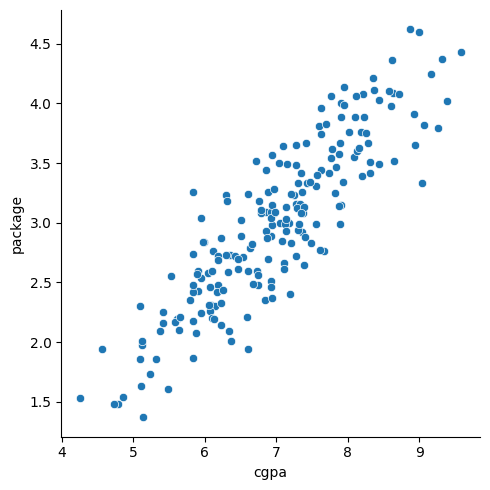

In [4]:
sns.relplot(data=df,x="cgpa",y="package")

In [5]:
# x1=df.iloc[:,0:1]
# y1=df.iloc[:,-1]

In [6]:
x=df[['cgpa']]
y=df['package']

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
x_train.size,x_test.size

(160, 40)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [10]:
lr.predict(x_test.iloc[1].values.reshape(1,1))

c:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.09324469])

In [11]:
x_test

,cgpa
112,8.58
29,7.15
182,5.88
199,6.22
193,4.57
85,4.79
10,5.32
54,6.86
115,8.35
35,6.87


In [12]:
y_test

112    4.10
29     3.49
182    2.08
199    2.33
193    1.94
85     1.48
10     1.86
54     3.09
115    4.21
35     2.87
12     3.65
92     4.00
13     2.89
126    2.60
174    2.99
2      3.25
44     1.86
3      3.67
113    2.37
14     3.42
23     2.48
25     3.65
6      2.60
134    2.83
165    4.08
173    2.56
45     3.58
65     3.81
48     4.09
122    2.01
178    3.63
64     2.92
9      3.51
57     1.94
78     2.21
71     3.34
128    3.34
176    3.23
131    2.01
53     2.61
Name: package, dtype: float64

<IPython.core.display.Javascript object>

<Axes: xlabel='cgpa', ylabel='package'>

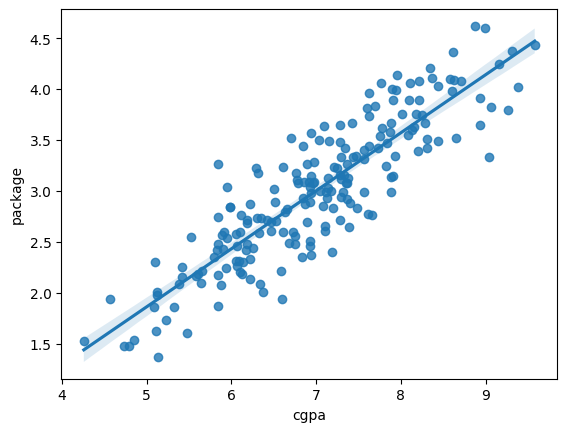

In [13]:
sns.regplot(data=df,x="cgpa",y="package")

<IPython.core.display.Javascript object>

c:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<IPython.core.display.Javascript object>

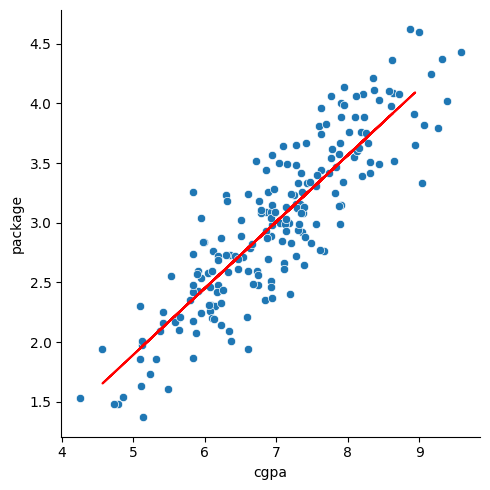

In [14]:
sns.relplot(data=df,x="cgpa",y="package")
plt.plot(x_test,lr.predict(x_test),color='red')

In [15]:
lr.coef_

array([0.55795197])

In [16]:
lr.intercept_

-0.8961119222429144

# Regression Metrics

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [31]:
y_pred=lr.predict(x_test.values.reshape(-1,1))

c:\Users\Naveen\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [32]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(f"The Mean Absolute Error obtained is : {mae}")
print(f"The Mean Squared Error obtained is : {mse}")
print(f"The Root Mean Squared Error obtained is:{rmse}")

<IPython.core.display.Javascript object>

The Mean Absolute Error obtained is : 0.2884710931878175
The Mean Squared Error obtained is : 0.12129235313495527
The Root Mean Squared Error obtained is:0.34827051717731616


In [33]:
r2score=r2_score(y_test,y_pred)
print(f"The R square value obtained is r2score: {r2score}")

The R square value obtained is r2score: 0.780730147510384


# Adjusted R2 score

In [35]:
adjR2=1-(((1-r2score)*(x_test.shape[0]-1))/(x_test.shape[0]-1-1))
adjR2

0.7749598882343415